In [5]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling - Sheet1.csv to Churn_Modelling - Sheet1.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

Load and inspect the data

In [7]:
df = pd.read_csv("Churn_Modelling - Sheet1.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Check structure:

In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#**Data cleaning**

Remove unnecessary columns

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)


Check missing values

In [10]:
df.isnull().sum()


,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Encode categorical variables

In [11]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


Feature engineering

In [12]:
df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1)
df['IsSenior'] = (df['Age'] > 50).astype(int)


Define features (X) and target (y)

In [13]:
X = df.drop('Exited', axis=1)
y = df['Exited']


Train–test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Scale numerical features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train models

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Evaluate models

In [18]:
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

print("Logistic Regression")
evaluate_model(y_test, y_pred_lr)

print("\nRandom Forest")
evaluate_model(y_test, y_pred_rf)


Logistic Regression
Accuracy: 0.8095
Precision: 0.6
Recall: 0.19164619164619165
[[1541   52]
 [ 329   78]]

Random Forest
Accuracy: 0.8605
Precision: 0.7782608695652173
Recall: 0.4398034398034398
[[1542   51]
 [ 228  179]]


Churn probability

In [19]:
churn_prob = rf.predict_proba(X_test)[:, 1]
churn_prob[:10]


array([0.05, 0.05, 0.09, 0.01, 0.1 , 0.21, 0.06, 0.16, 0.5 , 0.06])

Feature importance (churn drivers)

In [20]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=df.drop('Exited', axis=1).columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
Age,0.197886
NumOfProducts,0.127692
EstimatedSalary,0.124576
CreditScore,0.124183
Balance,0.109635
BalanceSalaryRatio,0.095734
Tenure,0.072006
IsActiveMember,0.043104
IsSenior,0.028709
Geography_Germany,0.026728


Plot:

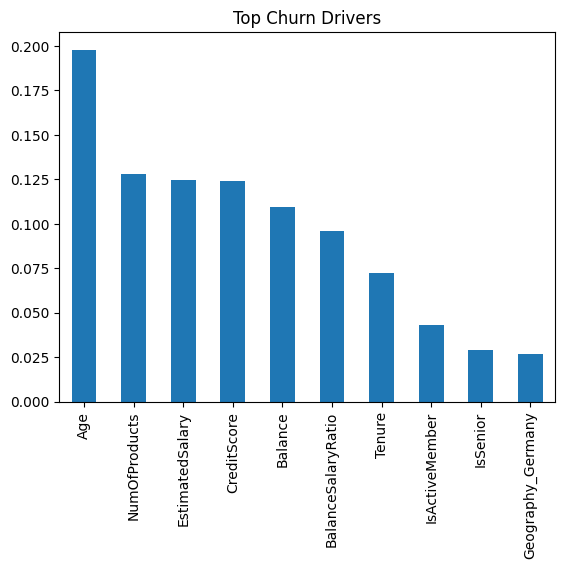

In [21]:
feature_importance.head(10).plot(kind='bar')
plt.title("Top Churn Drivers")
plt.show()


In [22]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=df.drop('Exited', axis=1).columns
).sort_values(ascending=False)


In [23]:
fi_df = feature_importance.reset_index()
fi_df.columns = ['Feature', 'Importance']

fi_df.to_csv("feature_importance.csv", index=False)


In [24]:
fi_df.to_csv("feature_importance.csv", index=False)


In [25]:
from google.colab import files
files.download("feature_importance.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df.to_csv("churn_modified_data.csv", index=False)

In [27]:
from google.colab import files
files.download("churn_modified_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>